# Image classification

## Import TensorFlow and other libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Download and explore the dataset

This tutorial uses a dataset of about 3,700 photos of flowers. The dataset contains 5 sub-directories, one per class:

```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

In [2]:
!wget dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

--2021-03-26 09:18:14--  http://dataset_url/
Resolving dataset_url (dataset_url)... failed: Name or service not known.
wget: unable to resolve host address ‘dataset_url’
--2021-03-26 09:18:14--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-03-26 09:18:14--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 173.194.76.128, 66.102.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   119MB/s    in 1.8s    

2021-03-26 09:18:16 (119 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]

FINISHED --2021-03-26 09:18:16--
Total wall clock time: 2.1s
Downloaded: 1 files, 

In [3]:
!tar -zxvf flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

# Introduction to CNN

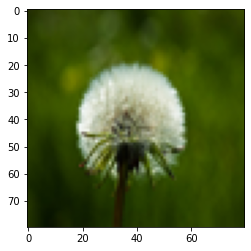

In [4]:
img_height = 80
img_width = 80
im_name='flower_photos/dandelion/14211880544_5d1f9d5aa8_n.jpg'

img=PIL.Image.open(im_name).resize((img_width,img_height))

img = np.array(img)
plt.imshow(img)

In [5]:
model = Sequential()
model.add(layers.Conv2D(1,3,padding='same',input_shape=(img_height, img_width, 3),activation='relu'))

In [6]:
model.layers[0].get_weights()[1]

array([0.], dtype=float32)

## The weights (kernel), we can initial them outself

In [7]:
kernel=[[-1.0, -1, -1],
       [-1, 8, -1],
       [-1, -1, -1]]
kernels=np.zeros((3,3,3,1),dtype=float)
kernels[:,:,0,0]=kernel
kernels[:,:,1,0]=kernel
kernels[:,:,2,0]=kernel
new_weight=[]
new_weight.append(kernels)
new_weight.append(np.array([0.0]))

In [8]:
model.layers[0].set_weights(new_weight)
model.layers[0].get_weights()

[array([[[[-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.]]],
 
 
        [[[-1.],
          [-1.],
          [-1.]],
 
         [[ 8.],
          [ 8.],
          [ 8.]],
 
         [[-1.],
          [-1.],
          [-1.]]],
 
 
        [[[-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.]]]], dtype=float32), array([0.], dtype=float32)]

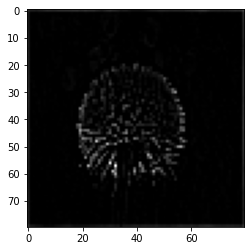

In [12]:
# model (trainable)
new_img=model.predict(img[np.newaxis])
plt.imshow(new_img[0,:,:,0],cmap='gray')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


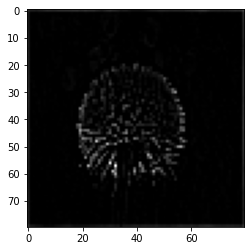

In [13]:
# convolution only
new_img=layers.Conv2D(1,(3,3),padding='same',weights=new_weight,input_shape=(img_height, img_width, 3),activation='relu').apply(img[np.newaxis].astype(np.float32))
plt.imshow(new_img[0,:,:,0],cmap='gray')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


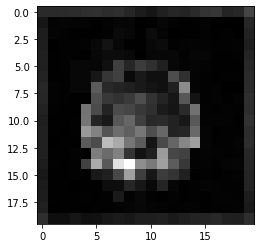

In [15]:
# Pooling results
new_img=layers.MaxPool2D().apply(new_img)
plt.imshow(new_img[0,:,:,0],cmap='gray')

<H1> Break :) </H1>

### CNN base model (Feature extractor)

In [16]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


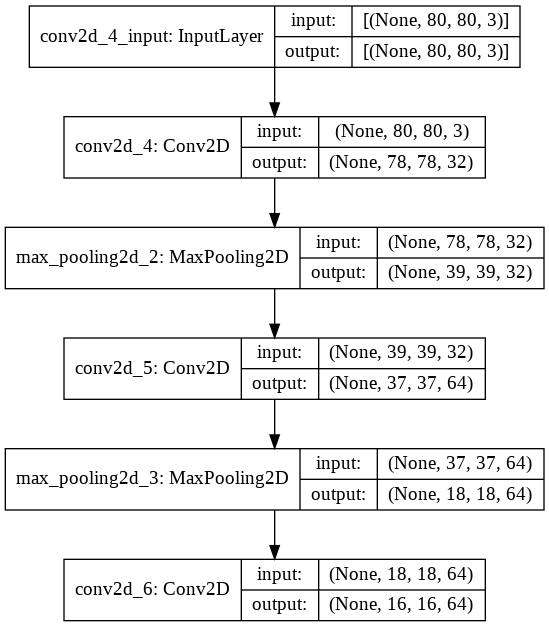

In [18]:
tf.keras.utils.plot_model(model,
to_file='model.png',
show_shapes=True)

### MLP (classification)

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 64)               

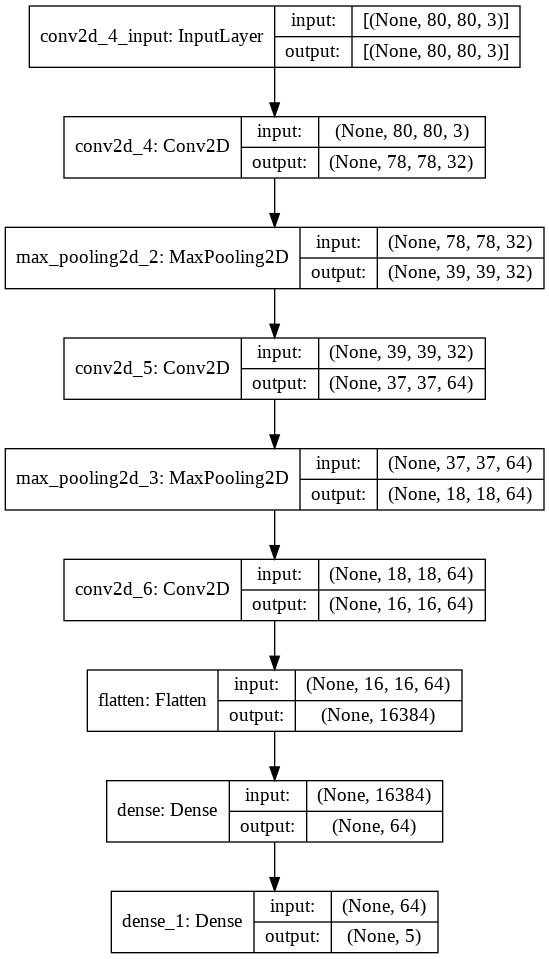

In [21]:
tf.keras.utils.plot_model(model,
to_file='model.png',
show_shapes=True)

In [22]:
prob=model.predict(img[np.newaxis])
prob

array([[1.0000000e+00, 6.6836934e-28, 3.1750361e-23, 8.0789131e-28,
        5.5258256e-11]], dtype=float32)

## Create a dataset (Prepare for model training)

Define some parameters for the loader:

In [23]:
data_dir="flower_photos"
batch_size = 32

It's good practice to use a validation split when developing your model. Let's use 80% of the images for training, and 20% for validation.

In [ ]:
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [ ]:
#class_names=train_ds.class_names
class_names=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

## Visualize the data

Here are the first 9 images from the training dataset.

(32, 80, 80, 3)
(32,)


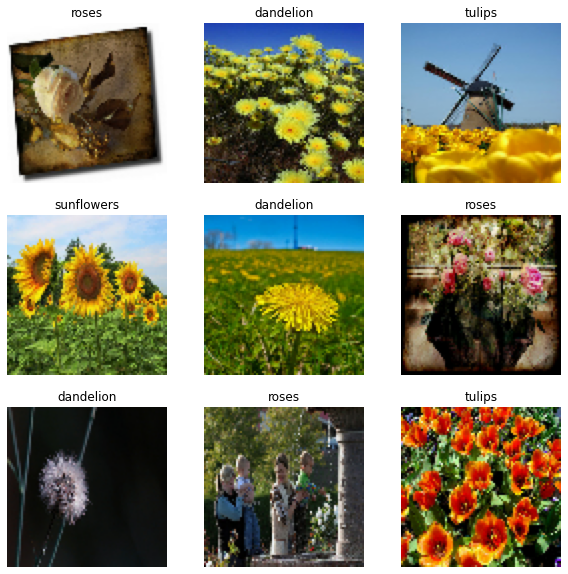

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print(images.shape)
  print(labels.shape)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

You will train a model using these datasets by passing them to `model.fit` in a moment. If you like, you can also manually iterate over the dataset and retrieve batches of images:

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images. 

You can call `.numpy()` on the `image_batch` and `labels_batch` tensors to convert them to a `numpy.ndarray`.


## Configure the dataset for performance

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training. 

Interested readers can learn more about both methods, as well as how to cache data to disk in the [data performance guide](https://www.tensorflow.org/guide/data_performance#prefetching).

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, you will standardize values to be in the `[0, 1]` range by using a Rescaling layer.

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

Note: you previously resized images using the `image_size` argument of `image_dataset_from_directory`. If you want to include the resizing logic in your model as well, you can use the [Resizing](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Resizing) layer.

# Create the model

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 128 units on top of it that is activated by a `relu` activation function. This model has not been tuned for high accuracy, the goal of this tutorial is to show a standard approach. 

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model

For this tutorial, choose the `optimizers.Adam` optimizer and `losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

View all the layers of the network using the model's `summary` method:

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 80, 80, 3)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)       

## Train the model

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 7s 20ms/step - loss: 1.4450 - accuracy: 0.3512 - val_loss: 1.0906 - val_accuracy: 0.5599
Epoch 2/20
92/92 [==============================] - 1s 6ms/step - loss: 1.0408 - accuracy: 0.5976 - val_loss: 0.9653 - val_accuracy: 0.6131
Epoch 3/20
92/92 [==============================] - 1s 6ms/step - loss: 0.9021 - accuracy: 0.6411 - val_loss: 0.8940 - val_accuracy: 0.6335
Epoch 4/20
92/92 [==============================] - 1s 6ms/step - loss: 0.7520 - accuracy: 0.7216 - val_loss: 0.9159 - val_accuracy: 0.6144
Epoch 5/20
92/92 [==============================] - 1s 6ms/step - loss: 0.6436 - accuracy: 0.7653 - val_loss: 0.8724 - val_accuracy: 0.6485
Epoch 6/20
92/92 [==============================] - 1s 6ms/step - loss: 0.5670 - accuracy: 0.7854 - val_loss: 0.9535 - val_accuracy: 0.6567
Epoch 7/20
92/92 [==============================] - 1s 6ms/step - loss: 0.4166 - accuracy: 0.8514 - val_loss: 0.9533 - val_accuracy: 0.6512
Epoch 8/20
92/92 [=

## Visualize training results

Create plots of loss and accuracy on the training and validation sets.

In [ ]:
def plot_performance(history,initial_epochs=0):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(initial_epochs,len(acc)+initial_epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

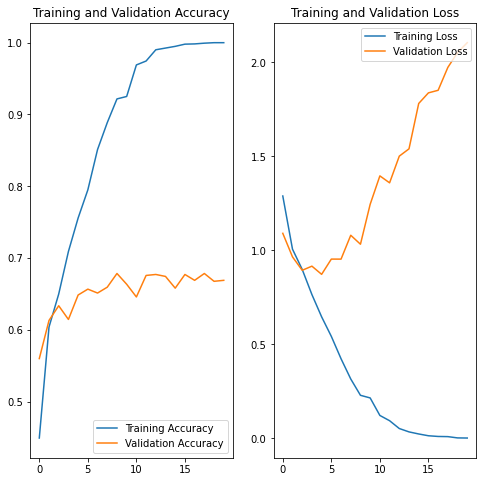

In [ ]:
plot_performance(history)

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 60% accuracy on the validation set.

Let's look at what went wrong and try to increase the overall performance of the model.

## Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use *data augmentation* and add *Dropout* to your model.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using experimental [Keras Preprocessing Layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/?version=nightly). These can be included inside your model like other layers, and run on the GPU.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times:

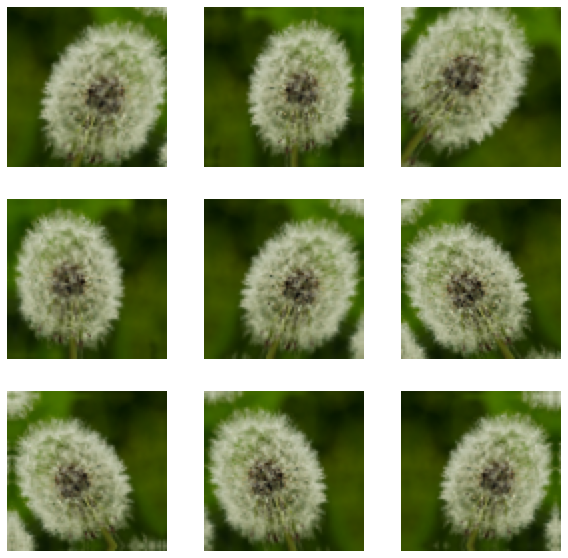

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

You will use data augmentation to train a model in a moment.

## Dropout

Another technique to reduce overfitting is to introduce [Dropout](https://developers.google.com/machine-learning/glossary#dropout_regularization) to the network, a form of *regularization*.

When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Let's create a new neural network using `layers.Dropout`, then train it using augmented images.

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

## Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 80, 80, 3)         0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 80, 80, 3)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 40, 40, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 20, 20, 32)      

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 2s 10ms/step - loss: 1.6482 - accuracy: 0.2556 - val_loss: 1.4420 - val_accuracy: 0.3447
Epoch 2/20
92/92 [==============================] - 1s 8ms/step - loss: 1.3922 - accuracy: 0.3904 - val_loss: 1.3247 - val_accuracy: 0.3692
Epoch 3/20
92/92 [==============================] - 1s 7ms/step - loss: 1.2606 - accuracy: 0.4485 - val_loss: 1.2001 - val_accuracy: 0.4809
Epoch 4/20
92/92 [==============================] - 1s 7ms/step - loss: 1.1653 - accuracy: 0.5037 - val_loss: 1.1505 - val_accuracy: 0.5163
Epoch 5/20
92/92 [==============================] - 1s 7ms/step - loss: 1.1992 - accuracy: 0.4781 - val_loss: 1.1588 - val_accuracy: 0.4714
Epoch 6/20
92/92 [==============================] - 1s 7ms/step - loss: 1.1148 - accuracy: 0.5452 - val_loss: 1.0947 - val_accuracy: 0.5599
Epoch 7/20
92/92 [==============================] - 1s 7ms/step - loss: 1.1030 - accuracy: 0.5278 - val_loss: 1.0883 - val_accuracy: 0.5531
Epoch 8/20
92/92 [=

## Visualize training results

After applying data augmentation and Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned. 

In [ ]:
plot_performance(history)

## Predict on new data

Finally, let's use our model to classify an image that wasn't included in the training or validation sets.

Note: Data augmentation and Dropout layers are inactive at inference time.

In [ ]:
!wget "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"

In [ ]:
#img=PIL.Image.open("592px-Red_sunflower.jpg").resize((img_width,img_height))
img=PIL.Image.open("flower_photos/dandelion/10294487385_92a0676c7d_m.jpg").resize((img_width,img_height))

img = np.array(img)

In [ ]:
predictions = model.predict(img[np.newaxis])
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
XX = model.input 
YY = model.layers[7].output
new_model = Model(inputs=[XX], outputs=[YY])

In [ ]:
predictions = new_model.predict(img[np.newaxis])

In [ ]:
plt.figure(figsize=(10, 20))
for i in range(32):
  tmp_im = predictions[0,:,:,i]
  ax = plt.subplot(8, 4, i + 1)
  plt.imshow(tmp_im,cmap='gray')
  plt.axis("off")

In [ ]:
model.save('my_model.h5') 

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
img=PIL.Image.open("flower_photos/dandelion/10294487385_92a0676c7d_m.jpg").resize((img_width,img_height))
img = np.array(img)
predictions = new_model.predict(img[np.newaxis])

In [ ]:
class_names[np.argmax(predictions)]

In [ ]:
np.max(predictions)

In [ ]:
predictions

# Transfered Learning
## InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input

base_model = InceptionV3(input_shape=(299,299,3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False
base_model.summary()

In [ ]:
input_shape=(299, 299, 3)
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=input_shape),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
inputs = tf.keras.Input(shape=(299, 299, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes)(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
img_height, img_width=299,299

train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
initial_epochs = 10
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

In [ ]:
plot_performance(history)

## Fine tuning

In [ ]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

In [ ]:
plot_performance(history_fine,10)

# Diabetic retinopathy classification

In [ ]:
!wget https://storage.googleapis.com/hello_data/Messider2C_Croped512.zip

--2021-03-21 04:09:19--  https://storage.googleapis.com/hello_data/Messider2C_Croped512.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 475799778 (454M) [application/zip]
Saving to: ‘Messider2C_Croped512.zip’

Messider2C_Croped51 100%[===================>] 453.76M   230MB/s    in 2.0s    

2021-03-21 04:09:22 (230 MB/s) - ‘Messider2C_Croped512.zip’ saved [475799778/475799778]



In [ ]:
!unzip Messider2C_Croped512.zip

Archive:  Messider2C_Croped512.zip
   creating: Messider2C_Croped512/
  inflating: Messider2C_Croped512/.DS_Store  
  inflating: __MACOSX/Messider2C_Croped512/._.DS_Store  
   creating: Messider2C_Croped512/0/
   creating: Messider2C_Croped512/1/
  inflating: Messider2C_Croped512/0/20051021_51936_0100_PP.png  
  inflating: Messider2C_Croped512/0/20051116_54484_0400_PP.png  
  inflating: Messider2C_Croped512/0/IM001096.png  
  inflating: Messider2C_Croped512/0/20051205_57838_0400_PP.png  
  inflating: Messider2C_Croped512/0/IM003695.png  
  inflating: Messider2C_Croped512/0/20060412_59012_0200_PP.png  
  inflating: Messider2C_Croped512/0/20060407_45379_0200_PP.png  
  inflating: Messider2C_Croped512/0/IM000405.png  
  inflating: Messider2C_Croped512/0/IM003124.png  
  inflating: Messider2C_Croped512/0/20051021_58035_0100_PP.png  
  inflating: Messider2C_Croped512/0/20051020_43882_0100_PP.png  
  inflating: Messider2C_Croped512/0/20051214_56688_0100_PP.png  
  inflating: Messider2C_Crope

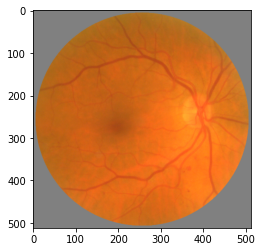

In [ ]:
img_height = 80
img_width = 80
im_name='Messider2C_Croped512/1/20060411_59919_0200_PP.png'

img=PIL.Image.open(im_name)

img = np.array(img)
plt.imshow(img)

In [ ]:
data_dir="Messider2C_Croped512"
batch_size = 32
img_width=299
img_height=299

In [ ]:
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input

base_model = InceptionV3(input_shape=(img_width,img_height,3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False
base_model.summary()

In [ ]:
inputs = tf.keras.Input(shape=(img_width,img_height, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
initial_epochs = 10
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)